# Intro

В файле excel данные по клиентам в Индии, кот. заполняли заявку на получение кредита

С приложенным сэмплом нужно сделать следующее:

- Найти инсайты, интересные закономерности в данных/главное ход мыслей и идеи  

- Категоризовать клиентов с повышенным дефолтом, которых можно считать мошенниками

- В рамках задачи потребуется разобраться в полях в датасете и их смысле

Опционально:

- Построить модель если это будет иметь смысл (метрику тоже подобрать по желанию, такую на которой можно сделать вывод).  

 Самое главное должны быть выводы, которые будут основаны на анализе.

**Таргет:**

-FPD5  - дефолтул ли клиент на первом кредите после достижения 5 дня после вызревания

**Поля в датасете:**

app_id                 - номер заявки

FSAccountHolderName – имя держателя банк счета

FSBankId – хэш банка

FSAccountNumber – номер счета

close_date – дата закрытия кредита

Name – имя клиента из документов

Address – адрес

AadhaarDOb – дата рождения

PAN – ПАН (местный ИНН)

TSAdhaarId – Аадхар (местный паспорт) замаскированный

TSApplicationCUstomerIp – айпи адрес заявки

FPD5 – флаг дефолта

MobilePhone – телефон мобильный

is_agr – флаг выдачи

Email – имейл

bureau_personal_info – перс данные из бюро по идентификаторам клиента

pan_premium_data – данные из пана

social_data_resp – соц. Данные по клиенту

GeoLatitude – долгота геолокации

GeoLongitude – широта геолоакации

Dt – время заведения заявки

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings  
warnings.filterwarnings("ignore") # `do not disturbe` mode

In [2]:
df = pd.read_excel('Test data AF.xlsx')
df

,Unnamed: 0,app_id,fsaccountholdername,fsbankid,fsaccountnumber,close_date,name,address,aadhaardob,pan,...,mobilephone,is_agr,email,isgeofake,geolatitude,geolongitude,dt,social_data_resp,bureau_personal_info,pan_premium_data
0,0,003C3E89-97AF-48D9-61AD-08DBECE16C53,Mr Rakesh Rakesh,b'02F8FAAB-F3EE-4F6C-96FE-8F7DE1BC7C0F',40347557800,2024-01-04,RAKESH,"C/O: Babbi,India,Pathankot,Pathankot,Pathankot...",20-07-1989,FIWPR3589C,...,918437429689,1,khoslar023@gmail.com,False,32.270270,75.648746,2023-11-26 07:36:34.9238402,"{'id': 'd90494da8dc2', 'state': 'APPROVE', 'se...","{'panVariations': [{'value': 'FIWPR3589C', 're...","{'request': {'pan': 'FIWPR3589C'}, 'bureau-pan..."
1,1,004D8634-79B8-478D-37A8-08DBE58A32B9,SUKAM SANDEEP PANDURANG,b'96DD237E-37EC-4F5C-94F0-2E7A368082D8',290501077002,2023-12-12,SANDEEP PANDURANG SUKAM,"S/O Pandurang Sukam, M S patil wadi rahivashi ...",01-03-1983,CBTPS6855F,...,919867953621,1,sandeepsukam305@gmail.com,False,19.135135,73.006736,2023-11-16 16:29:22.2651521,"{'id': '564f394310f9', 'state': 'APPROVE', 'se...","{'panVariations': [{'value': 'CBTPS6855F', 're...","{'request': {'pan': 'CBTPS6855F'}, 'bureau-pan..."
2,2,0053CDA6-94A5-4329-FC21-08DC160B3FDE,Mr Rinku Veshnav,b'02F8FAAB-F3EE-4F6C-96FE-8F7DE1BC7C0F',42317467486,2024-02-17,RINKU VESHNAV,"S/O: Harishankar Veshnav, graam talawda, Sheop...",15-12-2000,BSBPV5938C,...,916376283820,1,rinkuvaishnavvaishnav931@gmail.com,False,26.756757,75.871638,2024-01-16 07:03:13.4900160,"{'id': '7ca93fc46308', 'state': 'APPROVE', 'se...","{'panVariations': [{'value': 'BSBPV5938C', 're...","{'request': {'pan': 'BSBPV5938C'}, 'bureau-pan..."
3,3,00552791-C6F5-4711-DED4-08DC2A61F5AD,Mrs DIPIKA ROY,b'02F8FAAB-F3EE-4F6C-96FE-8F7DE1BC7C0F',20292784263,2024-03-11,DIPIKA SURAJ ROY,"W/O: Suraj Roy, Room NO: 207 Royai Apartment 2...",11-05-1990,BOLPR1564N,...,916000527850,1,surajroy200900@gmail.com,False,NaN,NaN,2024-02-11 14:35:45.8727356,"{'id': '2616c2f8de64', 'state': 'APPROVE', 'se...","{'panVariations': [{'value': 'BOLPR1564N', 're...","{'request': {'pan': 'BOLPR1564N'}, 'bureau-pan..."
4,4,006ABE88-4E0A-4586-8C74-08DC090DB493,SATHISH T,b'9EE33C9B-86D4-49E8-8531-F5408D3FBCF0',5582282002417,2024-01-30,SATHISH T,"S/O: Thangaraj, 2/248, PARAIYAPATTI PUTHUR POS...",20-05-1992,JUQPS4982A,...,916369062102,1,tsathish8940@gmail.com,False,11.117117,77.379955,2024-01-04 15:41:03.7838548,"{'id': 'ae1293e21c9f', 'state': 'APPROVE', 'se...","{'panVariations': [{'value': 'JUQPS4982A', 're...","{'request': {'pan': 'JUQPS4982A'}, 'bureau-pan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,10293,FF692E0C-539D-4EEB-45B5-08DC1A252382,ARUN PATEL,b'98CCBE8F-94EA-4B22-837F-F438F7BEEF22',50100608396638,2024-01-27,ARUN PATEL,"S/O: Jagannath Patel, 661, housing board colon...",04-02-1991,BQOPP0890C,...,919039491231,1,Arunpatel27dec@gmail.com,False,24.216216,80.744859,2024-01-23 03:59:55.5466359,"{'id': '68319763aaea', 'state': 'APPROVE', 'se...","{'panVariations': [{'value': 'BQOPP0890C', 're...","{'request': {'pan': 'BQOPP0890C'}, 'bureau-pan..."
10294,10294,FF7A8367-2AE2-450D-1831-08DC10E4791A,RAVI KUMAR NAPIT,b'58AD75ED-7B46-402E-BE39-8100B63F7FFB',470418210012079,2024-02-08,RAVI KUMAR NAPIT,"S/O Jaylal Napit, SORITAND, BARKI BOWA PO BHUL...",06-04-1992,BQBPN3897G,...,917827385272,1,napitravi8@gmail.com,False,23.675676,86.053677,2024-01-09 11:14:41.8556881,"{'id': 'c5d51e678adb', 'state': 'APPROVE', 'se...","{'panVariations': [], 'nameVariations': [{'val...","{'request': {'pan': 'BQBPN3897G'}, 'bureau-pan..."
10295,10295,FF84868F-8D2D-49D8-B952-08DBFDE67826,BALRAM,b'4C47F778-75DC-43FF-95DD-D563FDE2AD0A',917010019568614,NaN,BALRAM,"S/O: Mohan Singh, 77,gram awlay, Awlay, Indore...",10-06-1991,EYBPB7692J,...,918959304647,0,balramthakur1991@gmail.com,False,22.558559,75.663007,2023-12-17 04:20:20.2659671,"{'id': '3337acde1e91', 'state': 'APPROVE', 'se...","{'panVariations': [{'value': 'EYBPB7692J', 're...","{'request': {'pan': 'EYBPB7692J'}, 

In [3]:
# See how many unique values do we have!
for col in list(df.columns):
    print(str(df[col].value_counts().count())+' ' + col)

10298 Unnamed: 0
10298 app_id
9598 fsaccountholdername
119 fsbankid
9950 fsaccountnumber
163 close_date
9351 name
9957 address
5375 aadhaardob
10289 pan
7827 tsadhaarid
9989 tsapplicationcustomerip
2 fpd5
10292 mobilephone
2 is_agr
10286 email
2 isgeofake
1291 geolatitude
6562 geolongitude
10298 dt
9951 social_data_resp
9424 bureau_personal_info
9942 pan_premium_data


In [4]:
df.fpd5.value_counts() # Target value correlation. 0 - Non-Fraud, 1 - Fraud.

fpd5
0    6773
1    3525
Name: count, dtype: int64

### Categorisation.

In [5]:
df.dtypes # Mostly have categorical dtypes. That means we have to mannually change/transoform many of the features.

Unnamed: 0                   int64
app_id                      object
fsaccountholdername         object
fsbankid                    object
fsaccountnumber              int64
close_date                  object
name                        object
address                     object
aadhaardob                  object
pan                         object
tsadhaarid                  object
tsapplicationcustomerip     object
fpd5                         int64
mobilephone                  int64
is_agr                       int64
email                       object
isgeofake                     bool
geolatitude                float64
geolongitude               float64
dt                          object
social_data_resp            object
bureau_personal_info        object
pan_premium_data            object
dtype: object

#### Make notes on data that we have.

**Not all of the arrays will be used, mostly for categorisational purposes**

In [6]:
# Valuable features
class_1_0 = ['is_agr', 'isgeofake'] 
df['isgeofake'] = df['isgeofake'].astype(int)

# Space and Time:
geo_feat = ['geolatitude', 'geolongitude']
time_feat = ['close_date', 'dt']

# Personal data (many of these will not be used much except for names and emails(further, I will show why))
pers_feat = ['fsaccountholdername', 'fsaccountnumber', 'name', 'address', 'aadhaardob', 'pan', 'tsadhaarid', 'mobilephone', 'email']
pers_feat_dict = ['social_data_resp', 'bureau_personal_info']
pan_data = ['pan', 'pan_premium_data']

# Data that is stored in dictionaries that are large (will be excessive for modeling.)
dict_data = ['pan_premium_data', 'fsbankid', 'tsapplicationcustomerip']

## Handling and analyzing missing values (Data Cleaning).

In [7]:
df = df.drop(columns=['Unnamed: 0'])
(df.isnull()*1).sum() # See how many NULL values do we have per each column!

app_id                        0
fsaccountholdername           0
fsbankid                      0
fsaccountnumber               0
close_date                 5297
name                          0
address                       1
aadhaardob                    0
pan                           0
tsadhaarid                  132
tsapplicationcustomerip       1
fpd5                          0
mobilephone                   0
is_agr                        0
email                         5
isgeofake                     0
geolatitude                2180
geolongitude               2180
dt                            0
social_data_resp            347
bureau_personal_info        348
pan_premium_data            347
dtype: int64

In [8]:
# We will make use of this dataframe and analyse if NULL values are good indicators of the target - fpd5
NULLs = ['close_date', 'tsadhaarid', 'geolatitude', 'social_data_resp', 'bureau_personal_info', 'pan_premium_data']
df_NULLs = df.fillna('NULL') 

# Visualization and analysis

### NULL Feature - Target correltaions

close_date
NULL          1.233137
Name: count, dtype: float64


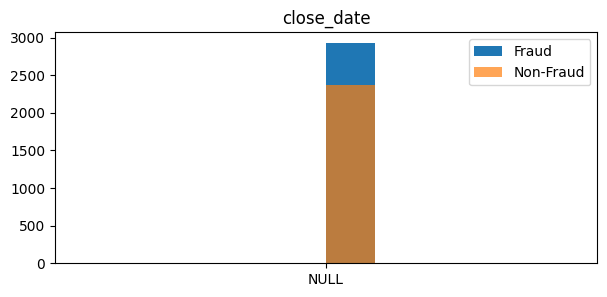

tsadhaarid
NULL          0.434783
Name: count, dtype: float64


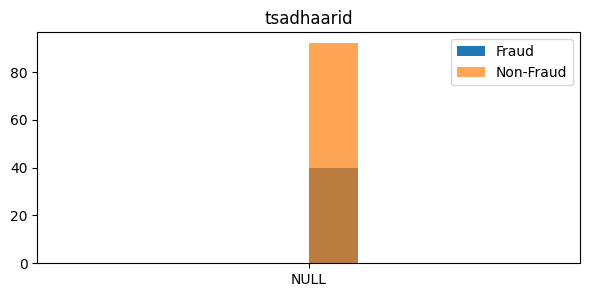

geolatitude
NULL           0.801653
Name: count, dtype: float64


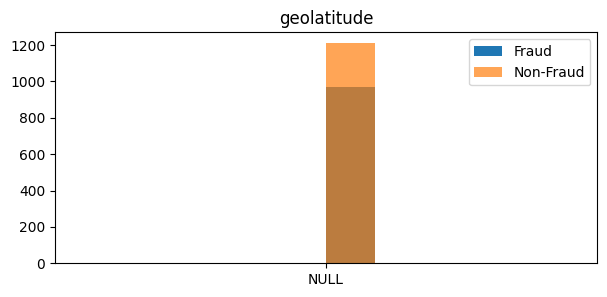

social_data_resp
NULL               NaN
Name: count, dtype: float64


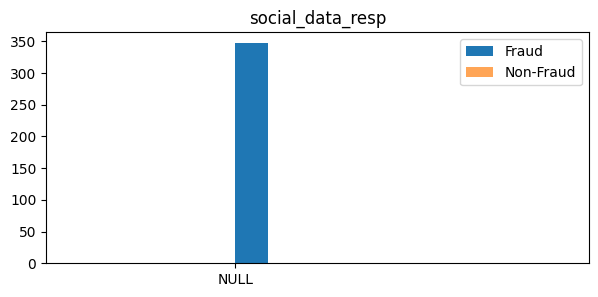

bureau_personal_info
NULL                   NaN
Name: count, dtype: float64


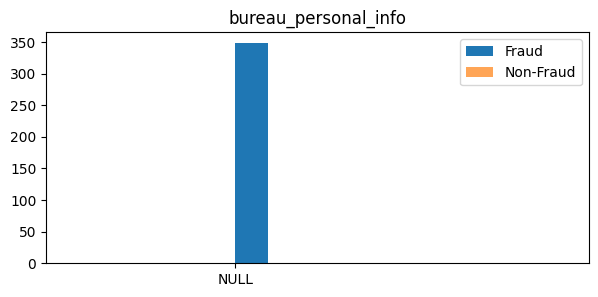

pan_premium_data
NULL               NaN
Name: count, dtype: float64


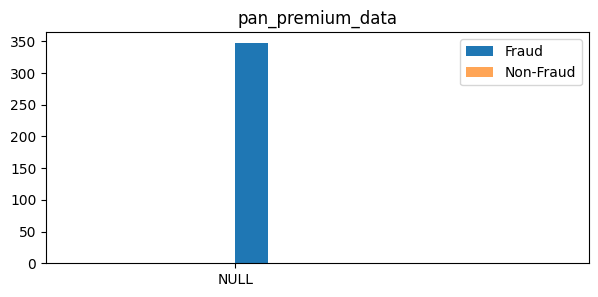

In [9]:
for col in df_NULLs[NULLs]:
    plt.figure(figsize=(7, 3))
    plt.hist(df_NULLs.loc[(df_NULLs.fpd5==1) & (df_NULLs[col]=='NULL'),[col]], label= 'Fraud')
    print(df_NULLs.loc[(df_NULLs.fpd5==1) & (df_NULLs[col]=='NULL'),[col]].value_counts()/
         df_NULLs.loc[(df_NULLs.fpd5==0) & (df_NULLs[col]=='NULL'),[col]].value_counts())
    plt.hist(df_NULLs.loc[(df_NULLs.fpd5==0) & (df_NULLs[col]=='NULL'),[col]], alpha =0.7,label= 'Non-Fraud')
    plt.title(col)
    plt.legend()
    plt.show()

When we had overal data we had ratio of target variable Fraud/Non-Fraud: 3525/6773 or **0.52**. Now that we categorized NULL values we have coefficients from **1.233** to **0.43** which tells us a lot when a user does not have information for some resons. Morever, we have **100% identification of fraud accounts** that do not have **social_data_resp, bureau_personal_info and pan_premium_data** 

### Unchanged Feature visuals

is_agr
1         3485
0           40
Name: count, dtype: int64 Fraud values
is_agr
1         4404
0         2369
Name: count, dtype: int64 Non-Fraud values


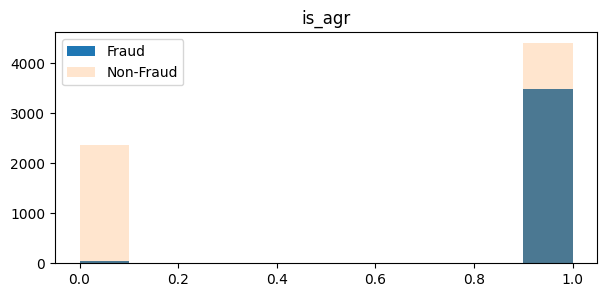

isgeofake
0            3508
1              17
Name: count, dtype: int64 Fraud values
isgeofake
0            6773
Name: count, dtype: int64 Non-Fraud values


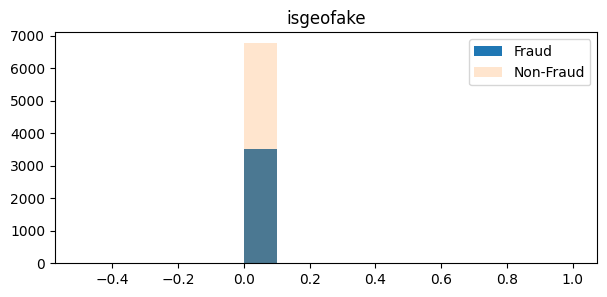

In [10]:
for col in df[class_1_0]:
    print(df.loc[df.fpd5==1,[col]].value_counts(), 'Fraud values')
    print(df.loc[df.fpd5==0,[col]].value_counts(), 'Non-Fraud values')
    plt.figure(figsize=(7, 3))
    plt.hist(df.loc[df.fpd5==1,[col]], label= 'Fraud')
    plt.hist(df.loc[df.fpd5==0,[col]], alpha =0.2,label= 'Non-Fraud')
    plt.title(col)
    plt.legend()
    plt.show()

Take a look at **is_agr** and **isgeofake** features. I chose them because they resemble **classification of either 0 or 1** - which is one of the most valuable informations! You may observe that when is_agr is **0 rate of Non-Fraud accounts are almost 0**, as well!

Also, isgeofake, not to surpirse, shows us that users who faked their location are **100%** Fraud users.

In [11]:
# Encoding one of the categorical features - as it is not too unqiue and may also provide a valuable info!
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.fsbankid)
df['fsbankid_le'] = le.transform(df.fsbankid)

In [12]:
df.groupby('fsbankid_le')['app_id'].count().sort_values(ascending=False).head() # Quick look at what bank ids used most in the dataset.

fsbankid_le
0     2398
89    1187
66     683
34     586
30     577
Name: app_id, dtype: int64

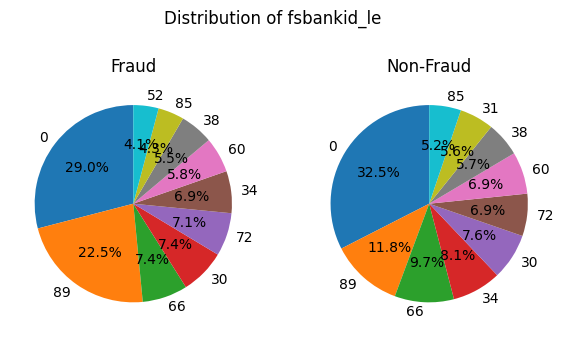

In [13]:
# See how target fpd5 is spread along popular bank ids
fraud_counts = df.loc[df.fpd5 == 1, 'fsbankid_le'].value_counts().head(10)
non_fraud_counts = df.loc[df.fpd5 == 0, 'fsbankid_le'].value_counts().head(10)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

axs[0].pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Fraud')

axs[1].pie(non_fraud_counts, labels=non_fraud_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Non-Fraud')

plt.suptitle('Distribution of ' + 'fsbankid_le') 
plt.show()

Also, interesting to note that **Fraud/Non-Fraud coeffs range from 1.9 - 0.8.. for popular banks!**

# Feature engineering

## Time conversion: dt, close_date

### Age extraction (aadhaardob).
From **aadhaardob** we will be extacting **ages** of users - **expectation is that older users tend less to fraud.**

In [14]:
# Calculate age from aadhaardob
df['aadhaardob'] = pd.to_datetime(df['aadhaardob'], errors='coerce', dayfirst=True)
df['age'] = pd.to_datetime('today').year - pd.to_datetime(df['aadhaardob']).dt.year

### Close date and dt conversion
**This procedure is done for machine learning fitting.**

In [15]:
# Extract time-related features from Dt
df['dt'] = pd.to_datetime(df['dt'])
df['application_hour'] = df['dt'].dt.hour
df['application_day'] = df['dt'].dt.dayofweek
df['application_month'] = df['dt'].dt.month

In [16]:
df['close_date'] = pd.to_datetime(df['close_date'])
df['close_date_year'] = df['close_date'].dt.year
df['close_date_month'] = df['close_date'].dt.month
df['close_date_day'] = df['close_date'].dt.day

### Location feature engingeering.
**Practive shows that it is excessive to transform geolocation as this procedure is computationally costly. Besides location are given as float dtypes, so we will not change it.**

### Name, email and Account holder name correlation
Main goal of this procedure is to see resemblence on if these features vary from each other much: 

**Expectation is that Fraud users would create temporary email adresses to access from multiple accounts**

In [17]:
df[['fsaccountholdername', 'name', 'email']]

,fsaccountholdername,name,email
0,Mr Rakesh Rakesh,RAKESH,khoslar023@gmail.com
1,SUKAM SANDEEP PANDURANG,SANDEEP PANDURANG SUKAM,sandeepsukam305@gmail.com
2,Mr Rinku Veshnav,RINKU VESHNAV,rinkuvaishnavvaishnav931@gmail.com
3,Mrs DIPIKA ROY,DIPIKA SURAJ ROY,surajroy200900@gmail.com
4,SATHISH T,SATHISH T,tsathish8940@gmail.com
...,...,...,...
10293,ARUN PATEL,ARUN PATEL,Arunpatel27dec@gmail.com
10294,RAVI KUMAR NAPIT,RAVI KUMAR NAPIT,napitravi8@gmail.com
10295,BALRAM,BALRAM,balramthakur1991@gmail.com
10296,ManjeetKumar,MANJEET KUMAR,manjeetkumargma@gmail.com


In [18]:
# Superficial analysis (Поверхностный анализ) on resemblence of name and fsaccountholdername.
print('fsname = name', df.loc[df['fsaccountholdername'] == df['name']].fpd5.value_counts(),'\n')
print('fsname != name', df.loc[df['fsaccountholdername'] != df['name']].fpd5.value_counts())

fsname = name fpd5
0    2362
1    1037
Name: count, dtype: int64 

fsname != name fpd5
0    4411
1    2488
Name: count, dtype: int64


In [19]:
# Function to remove the last 10 characters of a string
def remove_last_n_chars(s, n=10):
    if isinstance(s, str) and len(s) > n:
        return s[:-n]
    return s

# Apply the function to the 'Email' column
df['email'] = df['email'].apply(lambda x: remove_last_n_chars(x, 10))

# Normalize the data
def normalize_string(s):
    if isinstance(s, str):
        return ''.join(e for e in s.lower() if e.isalnum())
    return ''

df['NormalizedEmail'] = df['email'].apply(normalize_string)
df['NormalizedName'] = df['name'].apply(normalize_string)
df['NormalizedFSAccountHolderName'] = df['fsaccountholdername'].apply(normalize_string)

In [20]:
from scipy.stats import chi2_contingency

# Chi-square test for categorical variables
contingency_table = pd.crosstab(df['NormalizedEmail'], df['NormalizedName'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 95771400.00000049, p-value: 2.6916196866550035e-09


p-value of **0** suggests as that we should **reject null hypothesys** - which means, there most be some correlations between email and name, for example.

In [21]:
# Libraries chosen for their simplicity and efficacy for finding resemblence between features mentioned above.
from sklearn.feature_extraction.text import TfidfVectorizer
import jellyfish

# Levenshtein Distance
def levenshtein_distance(a, b):
    return jellyfish.levenshtein_distance(a, b)

# Jaro-Winkler Distance
def jaro_winkler(a, b):
    return jellyfish.jaro_winkler_similarity(a, b)

In [22]:
# Calculate similarities and add as columns:
df['Email_Name_Levenshtein'] = df.apply(lambda row: levenshtein_distance(row['NormalizedEmail'], row['NormalizedName']), axis=1)
df['Name_AccHolder_Levenshtein'] = df.apply(lambda row: levenshtein_distance(row['NormalizedName'], row['NormalizedFSAccountHolderName']), axis=1)
df['Email_AccHolder_Levenshtein'] = df.apply(lambda row: levenshtein_distance(row['NormalizedEmail'], row['NormalizedFSAccountHolderName']), axis=1)

df['Email_Name_JaroWinkler'] = df.apply(lambda row: jaro_winkler(row['NormalizedEmail'], row['NormalizedName']), axis=1)
df['Name_AccHolder_JaroWinkler'] = df.apply(lambda row: jaro_winkler(row['NormalizedName'], row['NormalizedFSAccountHolderName']), axis=1)
df['Email_AccHolder_JaroWinkler'] = df.apply(lambda row: jaro_winkler(row['NormalizedEmail'], row['NormalizedFSAccountHolderName']), axis=1)

### Forged features testing.
**Let us see if features that we created provide new insights on the data:** 

In [23]:
custom_feat = ['age', 'application_hour', 'application_day', 'application_month', 
               'close_date_day', 'close_date_month', 'close_date_year',
               'Email_Name_Levenshtein', 'Name_AccHolder_Levenshtein', 'Email_AccHolder_Levenshtein', 'Email_Name_JaroWinkler', 'Name_AccHolder_JaroWinkler', 'Email_AccHolder_JaroWinkler']

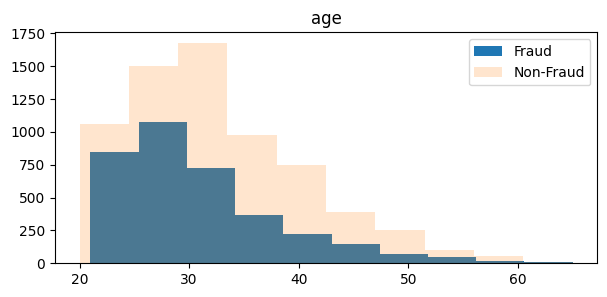

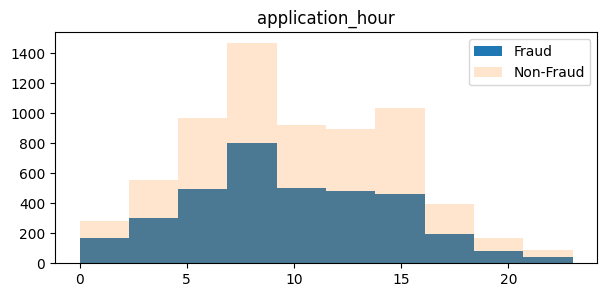

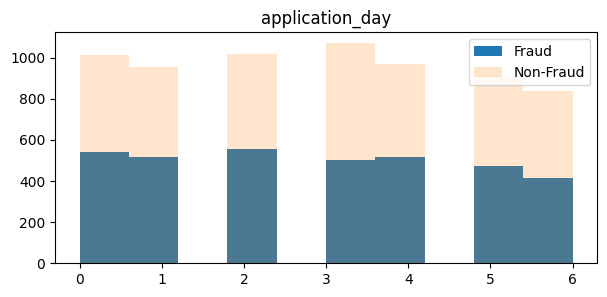

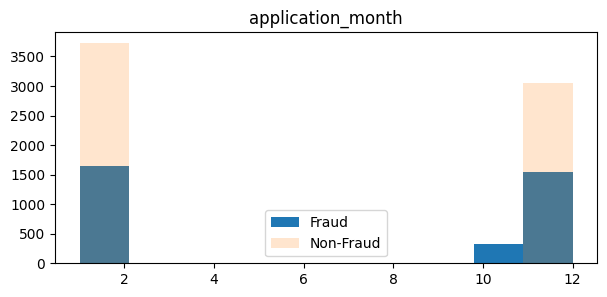

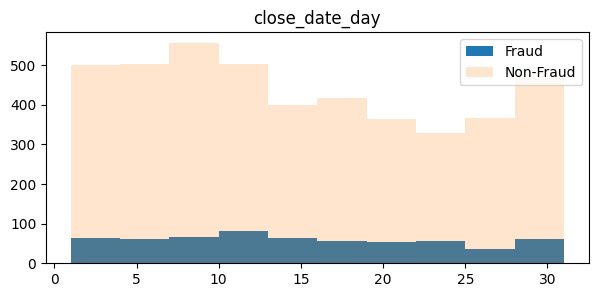

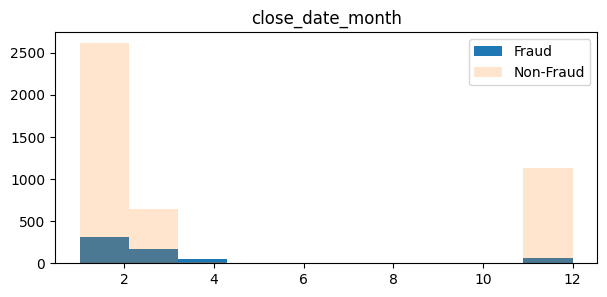

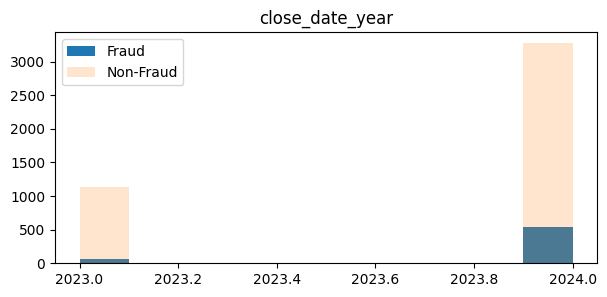

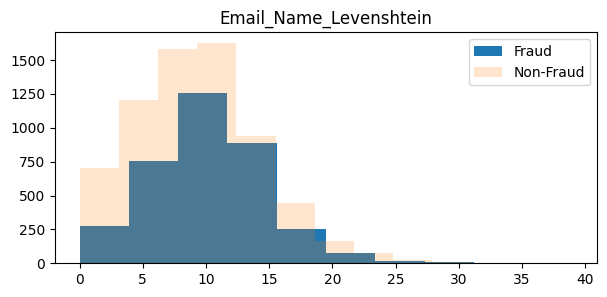

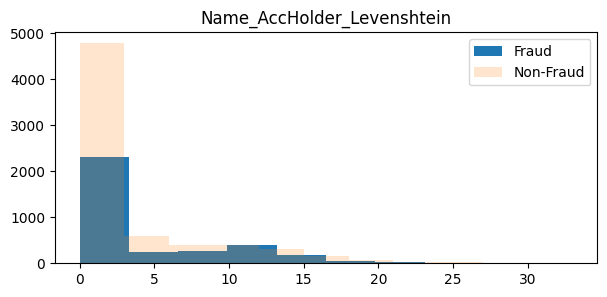

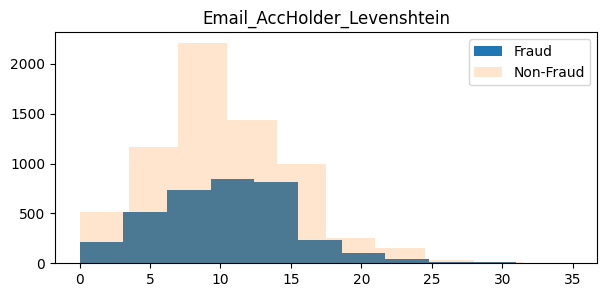

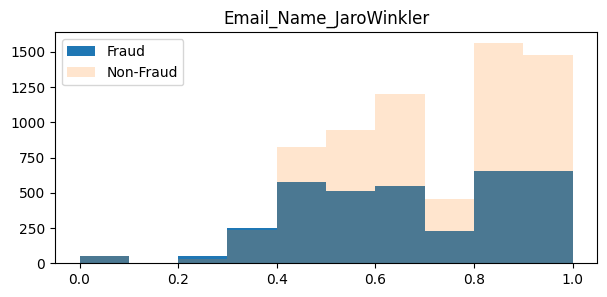

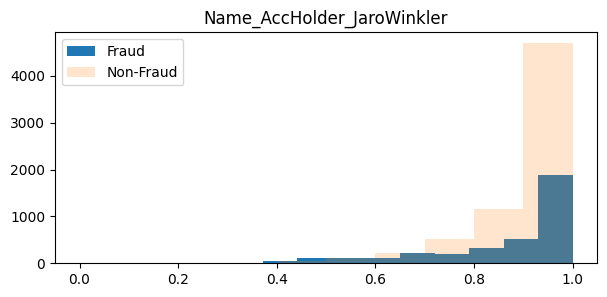

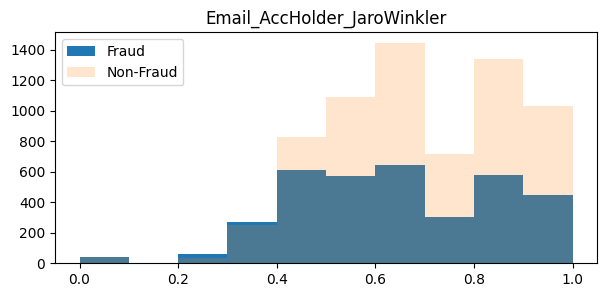

In [24]:
for col in df[custom_feat]:
#    print(df.loc[df.fpd5==1,[col]].value_counts(), 'Fraud values')
#    print(df.loc[df.fpd5==0,[col]].value_counts(), 'Non-Fraud values')
    plt.figure(figsize=(7, 3))
    plt.hist(df.loc[df.fpd5==1,[col]], label= 'Fraud')
    plt.hist(df.loc[df.fpd5==0,[col]], alpha =0.2,label= 'Non-Fraud')
    plt.title(col)
    plt.legend()
    plt.show()

### Results 1:

**age** - As expected, most of the Fraud users are not older than 33-35.

**application dates** - does note provide many results, unfortunately.

**close_date** - An expected conclusion can be done - when **null**, it is about **60 %** being Fraud, as we have seen previously when testing NULL values. 
Although, when it is present - **Fraud chance are about less than 10 %**. Pretty expected, but valuable information.

**Levenshtein and JaroWinkler** - Numbers and coefficients shows how much names and email are different from each other based on individual charachters 
(for example, if Levenshtein = 10 - this means a name and email are different by 10 chars.). Levenshtein metric is easier to interpret - interestingly, 
there is a tendency of having Fraud accounts when the chars in email and name differ by 10-15 points! Non-obvious, but valuable insight!

In [25]:
df.columns

Index(['app_id', 'fsaccountholdername', 'fsbankid', 'fsaccountnumber',
       'close_date', 'name', 'address', 'aadhaardob', 'pan', 'tsadhaarid',
       'tsapplicationcustomerip', 'fpd5', 'mobilephone', 'is_agr', 'email',
       'isgeofake', 'geolatitude', 'geolongitude', 'dt', 'social_data_resp',
       'bureau_personal_info', 'pan_premium_data', 'fsbankid_le', 'age',
       'application_hour', 'application_day', 'application_month',
       'close_date_year', 'close_date_month', 'close_date_day',
       'NormalizedEmail', 'NormalizedName', 'NormalizedFSAccountHolderName',
       'Email_Name_Levenshtein', 'Name_AccHolder_Levenshtein',
       'Email_AccHolder_Levenshtein', 'Email_Name_JaroWinkler',
       'Name_AccHolder_JaroWinkler', 'Email_AccHolder_JaroWinkler'],
      dtype='object')

# Model.
**Spoiler: Random Forest without tuning turned out to be enough**

In [26]:
# Standard procedure with ML:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import model_selection

In [27]:
fold_feat_tar = ['fsbankid_le', 'is_agr', 'geolatitude', 'geolongitude', 'age', 'application_hour', 'application_day', 'application_month',
       'Email_Name_Levenshtein', 'Name_AccHolder_Levenshtein',
       'Email_AccHolder_Levenshtein', 'Email_Name_JaroWinkler',
       'Name_AccHolder_JaroWinkler', 'Email_AccHolder_JaroWinkler',
        'close_date_year', 'close_date_month', 'close_date_day', 'fpd5']

data = df[fold_feat_tar]

In [28]:
# Use stratified k-fold to even up train and test values when cross-validating:
data["strkf"] = -1
strkf = model_selection.StratifiedKFold(n_splits=5,shuffle=True,random_state=17)

for fold, (trn_, val_) in enumerate(strkf.split(X=data.drop(columns=['fpd5']), y=data['fpd5'])):
    data.loc[val_, 'strkf'] = fold

In [29]:
data

,fsbankid_le,is_agr,geolatitude,geolongitude,age,application_hour,application_day,application_month,Email_Name_Levenshtein,Name_AccHolder_Levenshtein,Email_AccHolder_Levenshtein,Email_Name_JaroWinkler,Name_AccHolder_JaroWinkler,Email_AccHolder_JaroWinkler,close_date_year,close_date_month,close_date_day,fpd5,strkf
0,0,1,32.270270,75.648746,35.0,7,6,11,9,8,12,0.605556,0.809524,0.485714,2024.0,1.0,4.0,1,4
1,65,1,19.135135,73.006736,41.0,16,3,11,12,10,14,0.857619,0.779832,0.651587,2023.0,12.0,12.0,0,1
2,0,1,26.756757,75.871638,24.0,7,1,1,13,2,15,0.838636,0.952381,0.687410,2024.0,2.0,17.0,0,4
3,0,1,NaN,NaN,34.0,14,6,2,12,8,13,0.630952,0.749206,0.587302,2024.0,3.0,11.0,0,1
4,72,1,11.117117,77.379955,32.0,15,3,1,5,0,5,0.722222,1.000000,0.722222,2024.0,1.0,30.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10293,66,1,24.216216,80.744859,33.0,3,1,1,5,0,5,0.928571,1.000000,0.928571,2024.0,1.0,27.0,0,1
10294,38,1,23.675676,86.053677,32.0,11,1,1,9,0,9,0.565079,1.000000,0.565079,2024.0,2.0,8.0,0,4
10295,31,0,22.558559,75.663007,33.0,4,6,12,10,0,10,0.875000,1.000000,0.875000,NaN,NaN,NaN,0,4
10296,30,1,26.342342,84.846615,24.0,8,1,2,3,0,3,0.960000,1.000000,0.960000,NaN,NaN,NaN,1,3


In [30]:
data.strkf.value_counts()

strkf
1    2060
2    2060
0    2060
4    2059
3    2059
Name: count, dtype: int64

In [31]:
# Libs for learning Curve - to ensure that model did not overfit!
from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.utils import check_random_state
from sklearn.model_selection import LearningCurveDisplay

In [32]:
def run(fold, model, feat_imp=False, plot_learning_curve=False):
    '''
    fold - on of the 5 folds to what we splitted the data [0:5]
    model - Random Forest used, cause it is easier to convert cat variables there and it can handle NULL values (less tuning).
    feat_imp - feature importance graph - See what features impact model decisions most.
    plot_learning_curve - stands for it's name.

    returns roc_auc coef.
    '''
    features = [f for f in data.columns if f not in ("fpd5", "strkf")]
    
    # get training data using folds
    data_train = data[data.strkf != fold].reset_index(drop=True)
    # get validation data using folds
    data_valid = data[data.strkf == fold].reset_index(drop=True)
    
    X = data[features]
    y = data['fpd5']
    x_train = data_train[features]
    y_train = data_train['fpd5']
    x_valid = data_valid[features]
    y_valid = data_valid['fpd5']
    
    # fit model on training data (ohe)
    model.fit(x_train, y_train)
    
    # predict on validation data
    # we will use the probability of 1s
    y_pred = model.predict_proba(x_valid)[:, 1]
    
    # get roc auc score
    auc = metrics.roc_auc_score(y_valid, y_pred)
    print(auc)

    if feat_imp:
        importances = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.show()
    # Generate learning curves
    if plot_learning_curve:
        #cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
        cv = strkf
        train_sizes=np.linspace(0.1, 1.0, 10)
        train_sizes, train_scores, valid_scores = learning_curve(
            model, X, y, cv=cv, train_sizes=train_sizes, scoring='roc_auc'
        )
        LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=valid_scores).plot()
        plt.show()

    return auc

In [33]:
# See what we got:
mean_sc = 0
for fold_ in range(5):
     sc = run(fold_, RandomForestClassifier())
     mean_sc = mean_sc + sc
print('Mean score:', mean_sc/5) 

0.9658977781267175
0.9752296459134805
0.9710376593127632
0.974219805776423
0.978615502268037
Mean score: 0.9730000782794843


0.9652927167569547


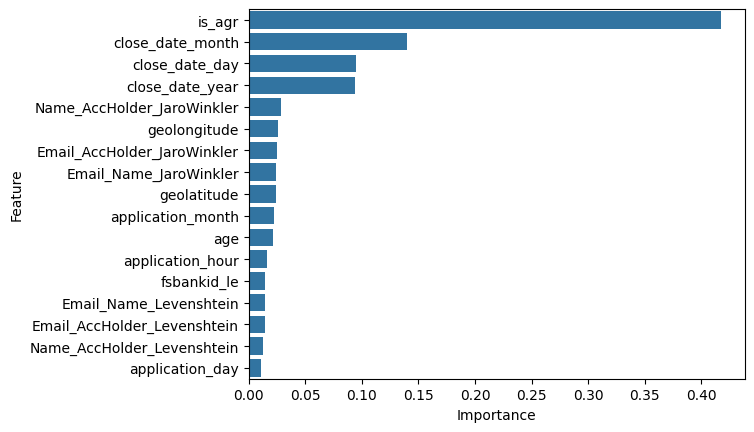

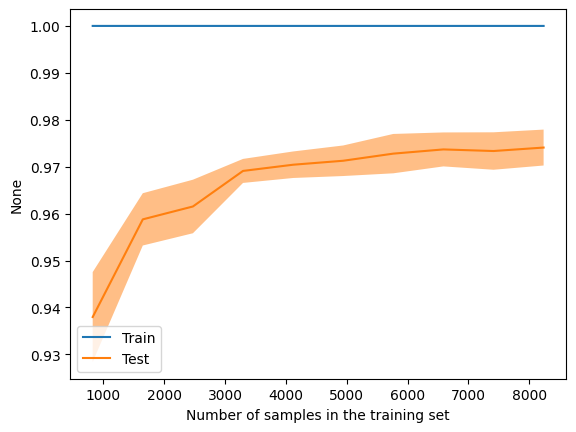

0.9652927167569547

In [34]:
run(0, RandomForestClassifier(), feat_imp=True, plot_learning_curve=True) #Choose arbitrary fold to see graphs.

# Conclusion

### Results 2:

Model seems not to overfit, which is good!

**is_agr**  - The most valuable feature in the model.

**close_date** - Top 2 valuable insight, somewhat expected. 

Other variables shows much less impact on the model, it's a shame, but reasonable.

### Featutes that I did not use:

**isgeofake** - when positive, **100% fraud!** Although only 17/10k values. Possibly would mislead the model.

**social_data_resp,
bureau_personal_info,
pan_premium_data** - when null, **100% Fraud!** The data is hidden in dicts, if needed - could be unpacked, but having 97 % roc_auc makes it excessive procedure.

**app_id, fsaccountnumber, tsadhaarid, tsapplicationcustomerip, pan, mobilephone** - To be short, did not use these features due to their uniquness, take a look at the quey below, again.

In [35]:
# See how many unique values do we have!
pers_feat2 = ['app_id', 'fsaccountnumber', 'tsadhaarid', 'tsapplicationcustomerip', 'pan', 'mobilephone']

for col in list(df[pers_feat2].columns):
    print(str(df[col].value_counts().count())+' ' + col)

10298 app_id
9950 fsaccountnumber
7827 tsadhaarid
9989 tsapplicationcustomerip
10289 pan
10292 mobilephone
